In [2]:
import numpy as np
import pandas as pd

# path to the csv file with output from (compiled and run) aspect_ratios.cpp
filename = "aspect_ratios.csv"

/home/ppjanka/anaconda3/envs/globAcc/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


           dx1       dx2       dx3   dx1/dx2    dx2/dx3   dx3/dx1  \
min   0.000169  0.000307  0.000122  0.550945   0.499993  0.052533   
mean  0.000993  0.001181  0.002202  0.780125   0.525357  2.540701   
max   0.026549  0.028416  0.051956  0.936621  20.373920  3.630110   

              dt1            dt2         dt3         dts1  ...      dtms  \
min      0.000266       0.000647    0.000131     0.000432  ...  0.000030   
mean     0.096137       0.468491    0.006687     0.006376  ...  0.004803   
max   7512.986000  102451.100000  481.624600  1117.666000  ...  0.517693   

            dt          vel1          vel2      vel3          bcc1  \
min   0.000030  5.278042e-08  9.815026e-09  0.000014  2.857201e-17   
mean  0.001712  1.058922e-01  4.756082e-02  2.367041  4.234756e-03   
max   0.137237  6.612377e-01  5.211211e-01  4.639079  9.533631e-02   

              bcc2          bcc3       valfven       rho  
min   3.096972e-18  1.228047e-17  6.923780e-13  0.000001  
mean  2.770313e-03 

<Figure size 432x288 with 0 Axes>

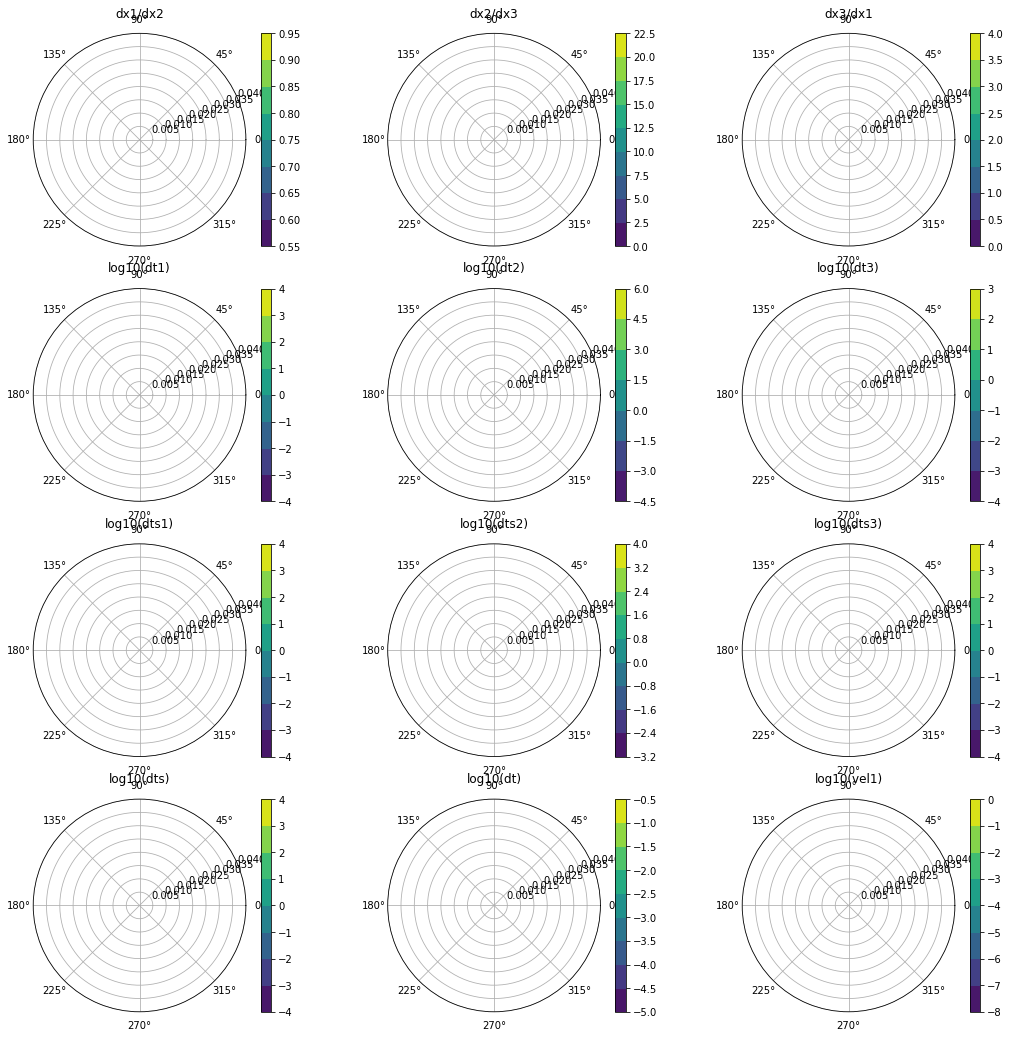

In [40]:
# show data summary and plot details

df = pd.read_csv(filename, sep='\s*,\s*')
print(df[['dx1','dx2','dx3','dx1/dx2','dx2/dx3','dx3/dx1','dt1','dt2','dt3','dts1','dts2','dts3','dts','dtms','dt','vel1','vel2','vel3','bcc1','bcc2','bcc3','valfven','rho']].describe().loc[['min', 'mean', 'max']])

ymax = 0.04

import matplotlib.pyplot as plt
plt.clf()
fig = plt.figure(figsize=[18,18])
ax = fig.add_subplot(431, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], df['dx1/dx2'])
plt.ylim(0.,ymax)
plt.title('dx1/dx2')
plt.colorbar()
ax = fig.add_subplot(432, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], df['dx2/dx3'])
plt.ylim(0.,ymax)
plt.title('dx2/dx3')
plt.colorbar()
ax = fig.add_subplot(433, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], df['dx3/dx1'])
plt.ylim(0.,ymax)
plt.title('dx3/dx1')
plt.colorbar()
ax = fig.add_subplot(434, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], np.log10(df['dt1']))
plt.ylim(0.,ymax)
plt.title('log10(dt1)')
plt.colorbar()
ax = fig.add_subplot(435, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], np.log10(df['dt2']))
plt.ylim(0.,ymax)
plt.title('log10(dt2)')
plt.colorbar()
ax = fig.add_subplot(436, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], np.log10(df['dt3']))
plt.ylim(0.,ymax)
plt.title('log10(dt3)')
plt.colorbar()
ax = fig.add_subplot(437, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], np.log10(df['dts1'].fillna(1.0)))
plt.ylim(0.,ymax)
plt.title('log10(dts1)')
plt.colorbar()
ax = fig.add_subplot(438, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], np.log10(df['dts2'].fillna(1.0)))
plt.ylim(0.,ymax)
plt.title('log10(dts2)')
plt.colorbar()
ax = fig.add_subplot(439, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], np.log10(df['dts3'].fillna(1.0)))
plt.ylim(0.,ymax)
plt.title('log10(dts3)')
plt.colorbar()
ax = fig.add_subplot(4,3,10, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], np.log10(df['dts'].fillna(1.0)))
plt.ylim(0.,ymax)
plt.title('log10(dts)')
plt.colorbar()
ax = fig.add_subplot(4,3,11, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], np.log10(df['dt']))
plt.ylim(0.,ymax)
plt.title('log10(dt)')
plt.colorbar()
ax = fig.add_subplot(4,3,12, projection='polar')
plt.tricontourf(0.5*np.pi-df['x2f'], df['x1f'], np.log10(df['vel1']))
plt.ylim(0.,ymax)
plt.title('log10(vel1)')
plt.colorbar()
plt.show()
plt.close()

In [41]:
# show the specific cell limiting simulation time step
df.iloc[df['dt'].idxmin()]

x1f           0.067437
x2f           1.831573
x3f           3.736777
dx1           0.000273
dx2           0.000414
dx3           0.000800
dx1/dx2       0.659000
dx2/dx3       0.517497
dx3/dx1       2.932291
dt1           0.001825
dt2           0.000837
dt3           0.001657
dts1       1117.666000
dts2       1696.003000
dts3       3277.322000
dts        1117.666000
dtms          0.000030
dt            0.000030
vel1          0.149413
vel2          0.494128
vel3          0.482526
bcc1          0.004626
bcc2          0.000428
bcc3          0.073169
valfven       9.156385
rho           0.000064
Name: 737072, dtype: float64